# Project 3: Linear regression with House Prices


## Introduction:
- In this notebook we will expereiment with a dataset that is provided from kaggle about predicting the price of a home with 79 features of homes in  Ames Iowa
- The goal is to use linear regression and other techniques to predict the price of a home with the parameters a person wants
- The Link of the kaggle dataset is here : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview 


## Features
- there are 79 features in this dataset.



## prequiestist

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
# Load data from datasets
trainingDataset= pd.read_csv("train.csv")

In [4]:
# feature lokking he
trainingDataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
# print  the result if any column has null values.
print(f"\nNull values %:\n {trainingDataset.apply(lambda x: sum(x.isnull()) / len(trainingDataset))}")
 


Null values %:
 Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64


In [6]:
# calulates unknkown values for our dataset
print(f"\nUnknown Values %:\n{trainingDataset.apply(lambda x: sum(x=='Unknown') / len(trainingDataset))}")


Unknown Values %:
Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 81, dtype: float64


In [7]:
# create  a list of variables that are either  int , float64 and objects

def DataTypeDescriptions(datasets):
    s = (datasets.dtypes == 'object')
    cat_cols = list(s[s].index)
    print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")


    s = (datasets.dtypes == 'float64')
    float64_cols = list(s[s].index)
    print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

    s = (datasets.dtypes == 'int64')
    int64_cols = list(s[s].index)
    print(f"\n{len(int64_cols)} int features:\n{int64_cols}")
    #del s # auto memory nerd stuff
    

DataTypeDescriptions(trainingDataset)

43 Categorical features:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

3 float64 features:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

35 int features:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Firepl

In [8]:
# function for creating ranges from cat_col columns from above

#makes dummy variables , creates ranges for each column and give them numbers if their implace 

def ObjectToCategory(category_colums,dataset):
    for col in category_colums:
        dummy_cols = pd.get_dummies(dataset[col], drop_first=True, prefix=col)
        dataset = pd.concat([dataset,dummy_cols],axis=1)
        dataset.drop(columns=col, inplace=True) 

    return dataset

## Insights

- In our last cell we found that our tarining dataset contains 43 categorical features, 3 float64 features and 35 int features
- we see how well they corelate and see how imporatant they are to the prediction of the price of our homes

<AxesSubplot:>

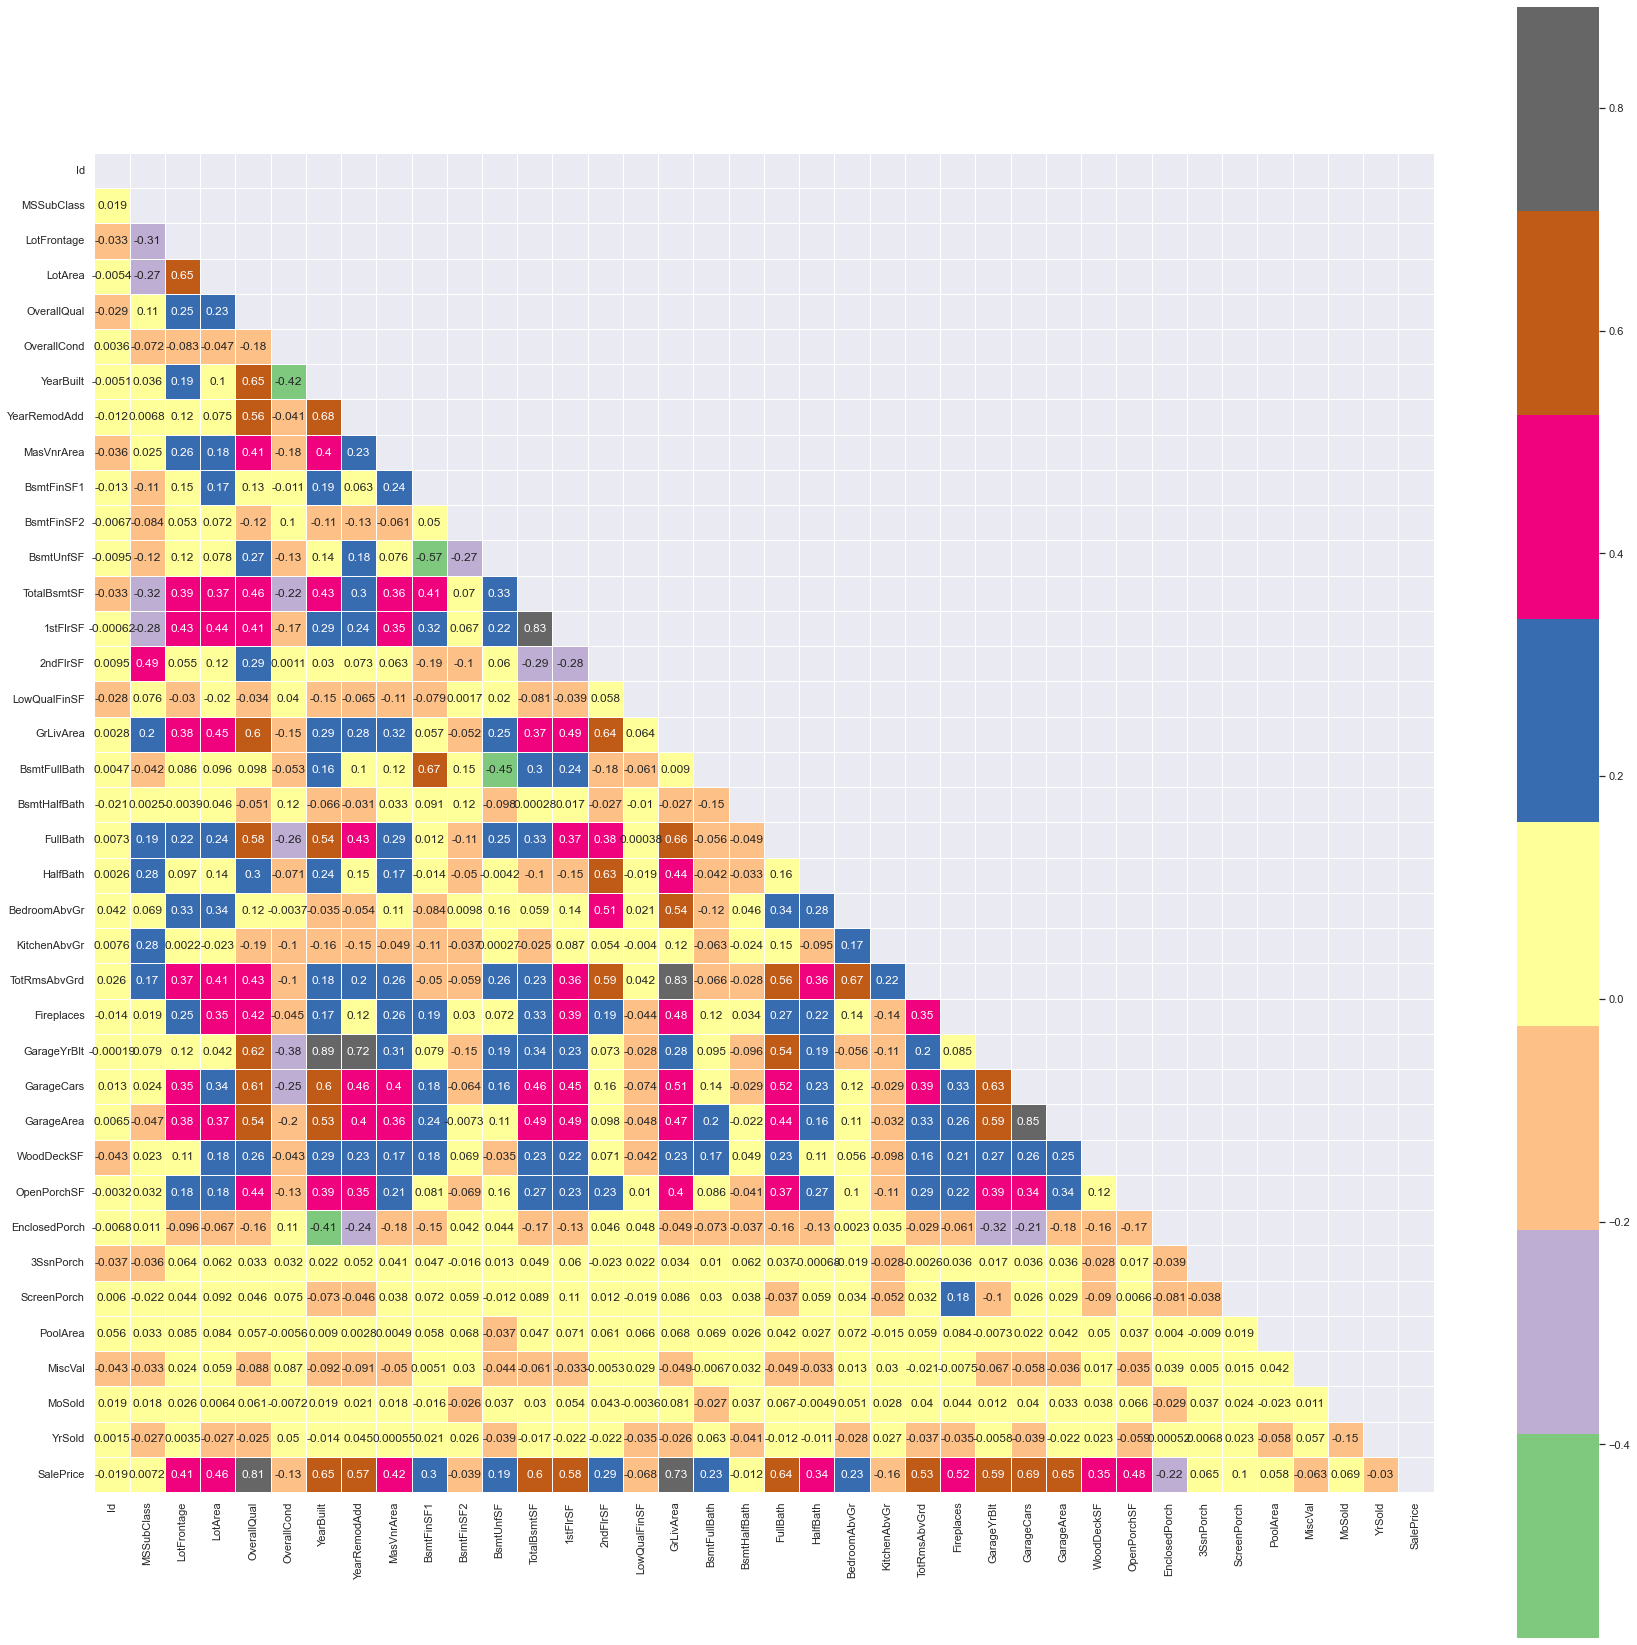

In [9]:
# We will make a corelation matrix to see how some features corelate with each other.
corelationMatrix = trainingDataset.corr(method="spearman")
mask=np.zeros_like(corelationMatrix)
mask[np.triu_indices_from(mask)] = True
sns.set(rc={'figure.figsize':(30,30)} )
#corlor maps cividis, BuPu ,cool , RdBu (best one yet), seismic (pretty too)
# muti color per section is awesome :tab20c, Accent (one of the best one yet)
sns.heatmap(corelationMatrix,annot=True,square=True,linewidths=.5,cmap="Accent",mask=mask)

## findings from the chart:
- seems that overallquality and sale price correlate very well with over 0.81 and  Good living area with 0.73 positive corelation.
-  enclosed portch and year built coerlate negatively at 0.41, could be an intresting thing to explore.
- garage area correlates with garage year built postive
- year built and garage year buit postive at 0.89
- garageyearbuilt corelates with year remod add with 0.72 
- total living area corelates with total roms above grd and kitchen above ground with 0.67
- BSMunsf is negatively corerelate with bsmunitsf with -0.45
- 1stflrsf correlates with totalbsmsf with 0.83 
- BSMunfsf corelatees negatively with bsmfirst2 -0.57
- yearbuilt corelates negative  with overall condition with -0.42
- we can get rid of id it useless 


In [10]:
# Muti linear regression model:
from sklearn.linear_model import LinearRegression

#need to merge sample_submisson datasets with our own, this kinda creates a problem of extreme imbalance but lets findout
pricePrdictionDataset=pd.read_csv("sample_submission.csv")
testDataset=pd.read_csv("test.csv")



mergedDataset=pd.concat([testDataset,pricePrdictionDataset],axis=1)




In [11]:
# showing the head of the merged dataset
mergedDataset.head()
# mergedDataset.iloc[0]
mergedDataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
Id                 int64
SalePrice        float64
Length: 82, dtype: object

## Muti Linear Regression:
- Since our dataset is so big we need to get rid a few( or more) preidctors (variables/features) to make our model cleaner and eaiser to handle.
-  our response will be our (price of home)
- our predictors (xi) will be our variables we use for our prediction of price.


In [12]:
# removing id tags from  datasets
noIDMergedDataset=mergedDataset.drop(['Id'],axis=1)
noIDMergedDataset.head()
noIDMergedDataset.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 80, dtype: object

In [13]:
# nullArray = noIDMergedDataset.nunique()
array =list(noIDMergedDataset.nunique())
cols=noIDMergedDataset.columns
count=0
for value in array:
    print(cols[count],value)
    count+=1


MSSubClass 16
MSZoning 5
LotFrontage 115
LotArea 1106
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 1
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 5
BldgType 5
HouseStyle 7
OverallQual 10
OverallCond 9
YearBuilt 106
YearRemodAdd 61
RoofStyle 6
RoofMatl 4
Exterior1st 13
Exterior2nd 15
MasVnrType 4
MasVnrArea 303
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 669
BsmtFinType2 6
BsmtFinSF2 161
BsmtUnfSF 793
TotalBsmtSF 736
Heating 4
HeatingQC 5
CentralAir 2
Electrical 4
1stFlrSF 789
2ndFlrSF 407
LowQualFinSF 15
GrLivArea 879
BsmtFullBath 4
BsmtHalfBath 3
FullBath 5
HalfBath 3
BedroomAbvGr 7
KitchenAbvGr 3
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 5
FireplaceQu 5
GarageType 6
GarageYrBlt 97
GarageFinish 3
GarageCars 6
GarageArea 459
GarageQual 4
GarageCond 5
PavedDrive 3
WoodDeckSF 263
OpenPorchSF 203
EnclosedPorch 131
3SsnPorch 13
ScreenPorch 75
PoolArea 7
PoolQC 2
Fence 4
MiscFeature 3
MiscVal 26
Mo

## Finding Normality:
- Normality refers to how  the distrubution of variables follow a normal disturbution.
- To find out we are going to plot a histogram and a QQ plot.

SalePrice's skew: 0.9293599840715666
SalePrice's kurt: 3.7947215778212326


C:\Users\Jose PC\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


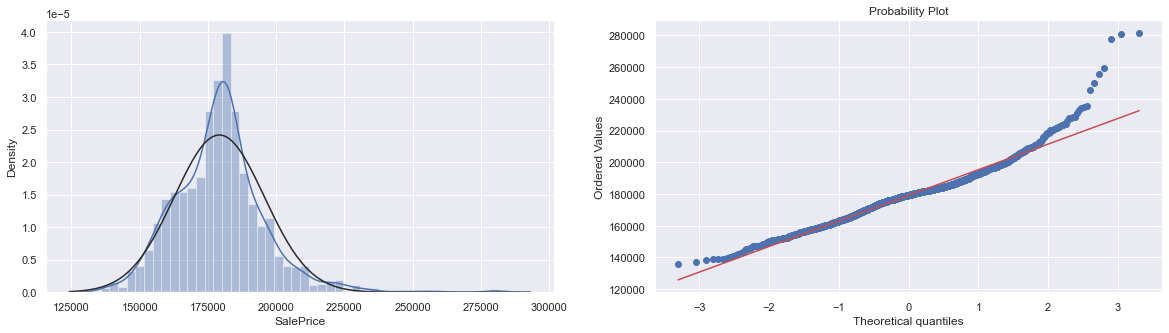

In [64]:
from scipy.stats import norm,skew, probplot

print(f"SalePrice's skew: {noIDMergedDataset.SalePrice.skew()}")
print(f"SalePrice's kurt: {noIDMergedDataset.SalePrice.kurt()}")
f, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.distplot(noIDMergedDataset.SalePrice, fit=norm, ax=ax[0]) # distrubution plot.
probplot(noIDMergedDataset.SalePrice, plot=ax[1]) # probality plot 
plt.show()

In [65]:
#  displays objects datatypes that are categories
DataTypeDescriptions(noIDMergedDataset)

43 Categorical features:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

12 float64 features:
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']

25 int features:
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Ki

In [16]:
cat_cols2=list(noIDMergedDataset.select_dtypes("object")) # Grabs the columns that have object datatypes
# cleanerDataset=ObjectToCategory(cat_cols2,noIDMergedDataset) # converetd dataset with all objects turn to categories


In [98]:
# Drops all the object data for easier disection of dataset:

cleanerDataset=noIDMergedDataset.select_dtypes(exclude=['object'])
DataTypeDescriptions(cleanerDataset)


0 Categorical features:
[]

12 float64 features:
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']

25 int features:
['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


## Which columns have the nulls

In [99]:
#count each columns amount of null values
array =list(cleanerDataset.nunique())
cols=cleanerDataset.columns
count=0
for value in array:
    print(cols[count],value)
    count+=1


# cleanerDataset.columns[nonNullDataset.isna().any()].tolist()
# cleanerDataset.notna()

MSSubClass 16
LotFrontage 115
LotArea 1106
OverallQual 10
OverallCond 9
YearBuilt 106
YearRemodAdd 61
MasVnrArea 303
BsmtFinSF1 669
BsmtFinSF2 161
BsmtUnfSF 793
TotalBsmtSF 736
1stFlrSF 789
2ndFlrSF 407
LowQualFinSF 15
GrLivArea 879
BsmtFullBath 4
BsmtHalfBath 3
FullBath 5
HalfBath 3
BedroomAbvGr 7
KitchenAbvGr 3
TotRmsAbvGrd 12
Fireplaces 5
GarageYrBlt 97
GarageCars 6
GarageArea 459
WoodDeckSF 263
OpenPorchSF 203
EnclosedPorch 131
3SsnPorch 13
ScreenPorch 75
PoolArea 7
MiscVal 26
MoSold 12
YrSold 5
SalePrice 1438


## Information about the most important colums that are  categories:



In [100]:
cleanerDataset.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,169277.052498
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,187758.393989
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,183583.683570
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,360,36,0,0,0,0,0,6,2010,179317.477511
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,82,0,0,144,0,0,1,2010,150730.079977


In [101]:
# Removes nan values:
# cleanerDataset
#re

#cleanerDataset.columns[cleanerDataset.isnull().sum() > 0]

# for c in ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
#          'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea',"LotFrontage",]:
#     cleanerDataset[c].fillna(0)   


for c in ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtFullBath',
         'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea',"BsmtUnfSF"]:
       cleanerDataset[c]=cleanerDataset[c].fillna(0)  
    
# for c in ['MSZoning', 'Exterior1st', 'Exterior2nd', 'Electrical', 'Utilities', 'SaleType', 'Functional', 'KitchenQual']:
#      cleanerDataset[c] = cleanerDataset[c].fillna(cleanerDataset[c].mode()[0])






# cleanerDataset.apply (pd.to_numeric, errors='coerce')
# nonNullDataset=cleanerDataset.dropna(how='all')
# nonNullDataset.reset_index(drop=True)
# nonNullDataset.isnull().any()




#cleanerDataset.head()

# print(nonNullDataset["LotFrontage"]=="NaN")


C:\Users\JOSEPC~1\AppData\Local\Temp/ipykernel_27220/3240676663.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanerDataset[c]=cleanerDataset[c].fillna(0)


In [102]:
cleanerDataset.isnull().sum()


MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [103]:
cleanerDataset.head()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,140,0,0,0,120,0,0,6,2010,169277.052498
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,393,36,0,0,0,0,12500,6,2010,187758.393989
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,212,34,0,0,0,0,0,3,2010,183583.683570
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,360,36,0,0,0,0,0,6,2010,179317.477511
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,82,0,0,144,0,0,1,2010,150730.079977


In [113]:
# Muti Linear regression
YResponse=cleanerDataset.pop("SalePrice")
xPredictor=cleanerDataset
# works
#xPredictor.dtypes 

#mutiReg=LinearRegression().fit(xPredictor,YResponse)


In [114]:
# forms the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xPredictor, YResponse, test_size = 0.2, random_state = 42)

In [115]:
#Applying the model:
mutiReg=LinearRegression().fit(x_train,y_train)




In [116]:
# y_prediction =  mutiReg.predict(x_test)
# y_prediction
mutiReg.score(x_test,y_test)

1.0

In [117]:
#prediction and score

# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error
# # predicting the accuracy score
# score=r2_score(y_test,y_prediction)
# print("r2 score is",score)
# print("mean_sqrd_error is",mean_squared_error(y_test,y_prediction))
# print("‘root_mean_squared error of is==’",np.sqrt(mean_squared_error(y_test,y_prediction)))

import statsmodels.api as sm

# with statsmodels
X = sm.add_constant(x_train) # adding a constant
 
model = sm.OLS(y_train,X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.257e+26
Date:                Sun, 07 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:45:27   Log-Likelihood:                 20015.
No. Observations:                1167   AIC:                        -3.996e+04
Df Residuals:                    1132   BIC:                        -3.978e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.918e+06   4.08e-07   4.69e+12

## Experiment 2 adaboost

In [118]:
#Ada boost experiment:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, KFold

ada_reg = AdaBoostRegressor(n_estimators=100)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None) 


ada_reg.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100)

In [ ]:
prediction=ada_reg.predict(x_test)
print(prediction)

In [124]:
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, ada_reg.predict(x_train)))

R2 Value: 0.9420364043633891


In [125]:
# test performanace for model
#result is to high
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

Accuracy 98.16104245452817


In [119]:
scores = cross_val_score(ada_reg, x_train,y_train,cv=5)
print("Mean cross-validataion score: %.2f" % scores.mean())

Mean cross-validataion score: 0.92


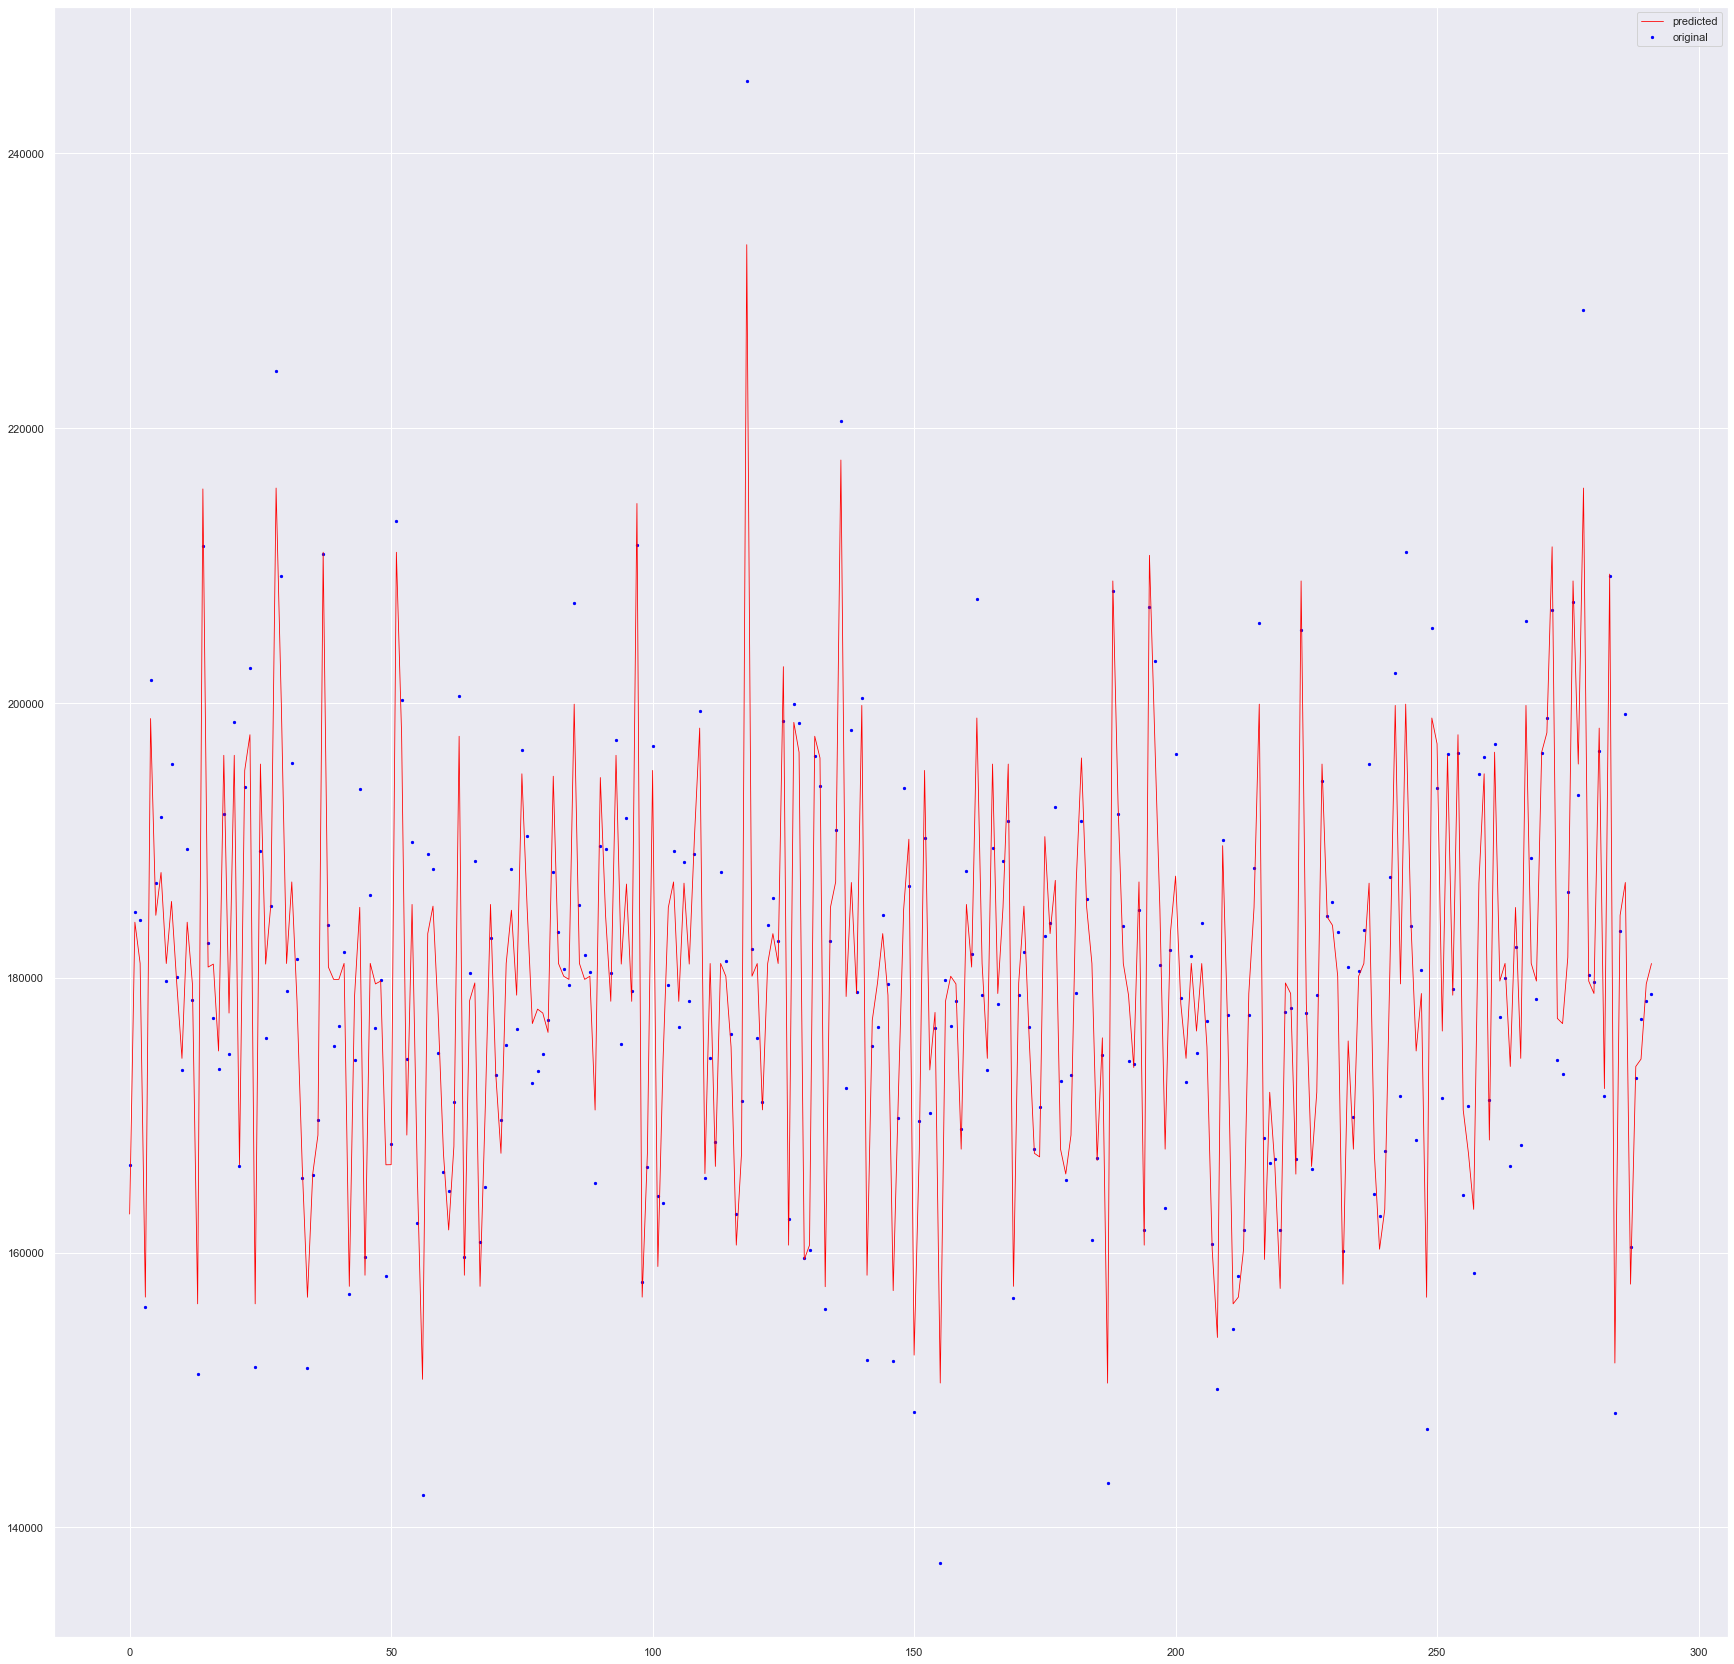

In [128]:
# Plot the adaboost

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, prediction, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()



## Exeriment 3 Random Forest